<a href="https://colab.research.google.com/github/Venkatanaveenkumar14/Human-Attentions-on-Deep-Fake-Media/blob/main/Quantitative%20Data%20Analysis%20on%20Human%20Attentions%20on%20Deep%20Fake%20Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

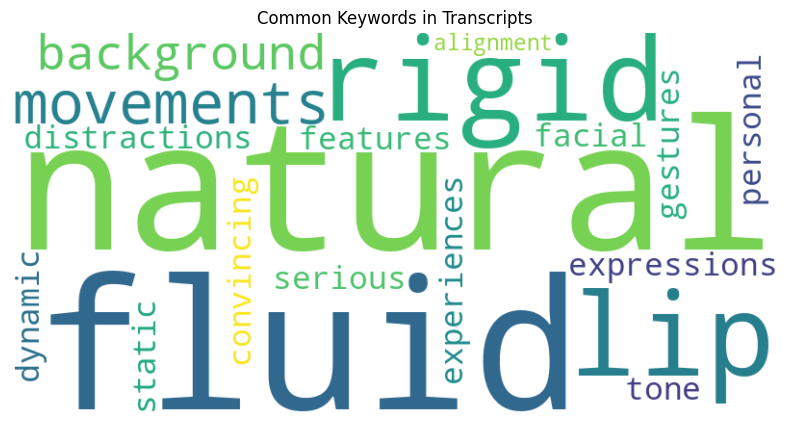

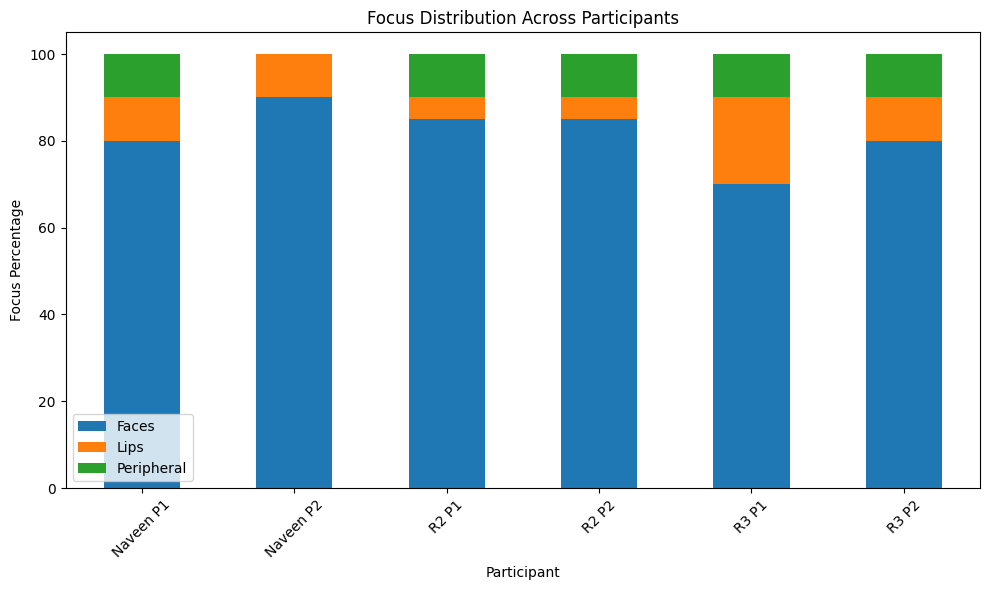

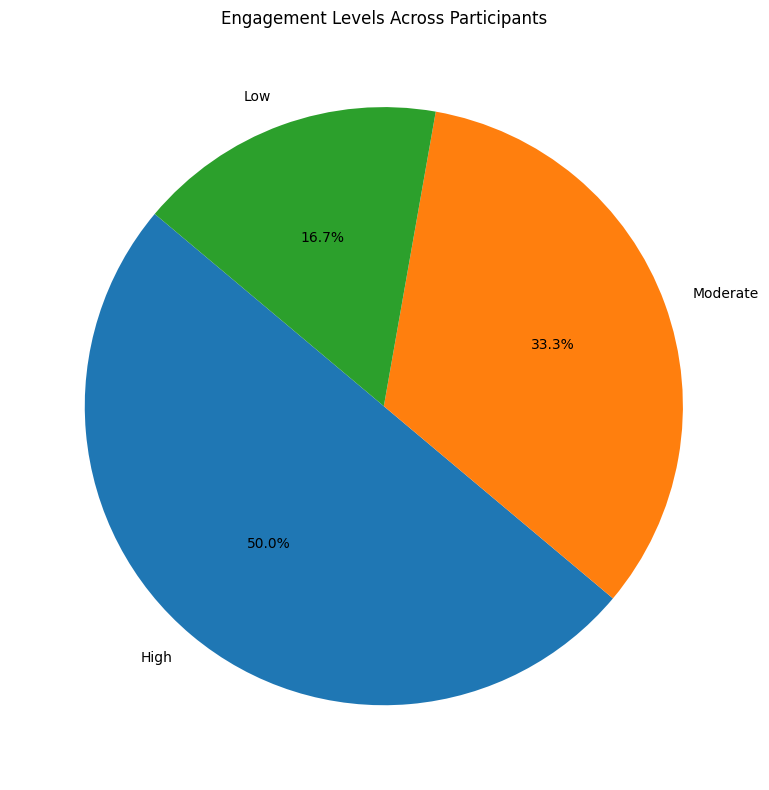

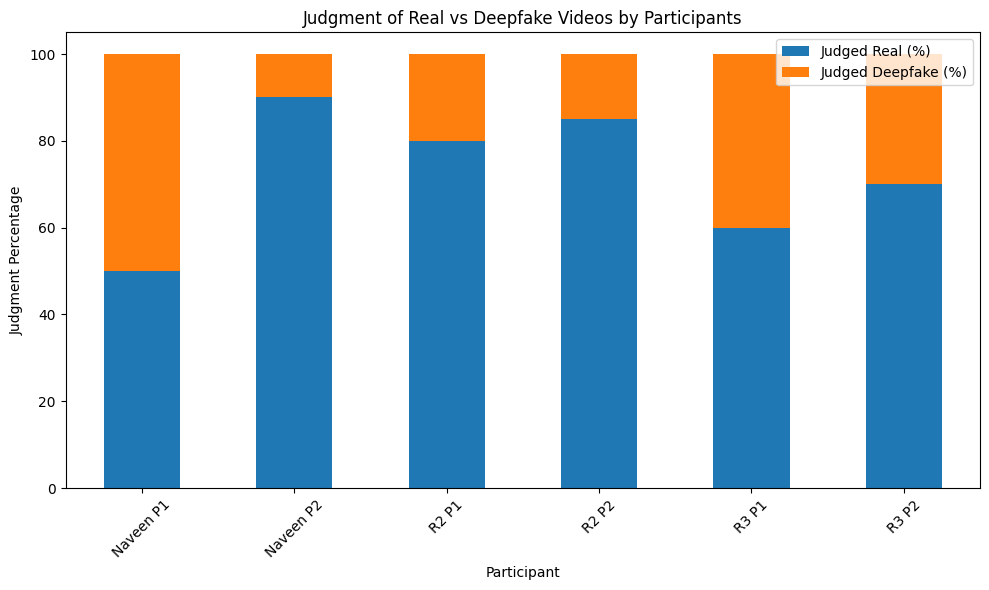

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample parsed data based on the provided transcript
data = {
    "Participant": ["Naveen P1", "Naveen P2", "R2 P1", "R2 P2", "R3 P1", "R3 P2"],
    "Phase": ["1&2", "3&4", "1&2", "3&4", "1&2", "3&4"],
    "Focus on Faces (%)": [80, 90, 85, 85, 70, 80],
    "Focus on Lips (%)": [10, 10, 5, 5, 20, 10],
    "Focus on Peripheral (%)": [10, 0, 10, 10, 10, 10],
    "Judged Real (%)": [50, 90, 80, 85, 60, 70],
    "Judged Deepfake (%)": [50, 10, 20, 15, 40, 30],
    "Warning Label Influence": ["No", "Strong", "Moderate", "Strong", "None", "Strong"],
    "Engagement Level": ["High", "Moderate", "High", "High", "Low", "Moderate"],
}

# Create word cloud based on repetitive keywords
transcripts = """
natural fluid rigid lip movements background distractions expressions convincing
serious tone personal experiences gestures facial features dynamic static alignment
"""

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(transcripts)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Keywords in Transcripts")
plt.show()

# Bar chart: Focus Areas
focus_areas = {
    "Faces": [80, 90, 85, 85, 70, 80],
    "Lips": [10, 10, 5, 5, 20, 10],
    "Peripheral": [10, 0, 10, 10, 10, 10],
}
participants = ["Naveen P1", "Naveen P2", "R2 P1", "R2 P2", "R3 P1", "R3 P2"]
df_focus = pd.DataFrame(focus_areas, index=participants)
df_focus.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Focus Distribution Across Participants")
plt.ylabel("Focus Percentage")
plt.xlabel("Participant")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart: Engagement Levels
engagement_levels = Counter(data["Engagement Level"])
plt.figure(figsize=(8, 8))
plt.pie(engagement_levels.values(), labels=engagement_levels.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Engagement Levels Across Participants")
plt.tight_layout()
plt.show()

# Stacked Bar Chart: Judged Real vs Deepfake
df_judgment = pd.DataFrame({
    "Judged Real (%)": data["Judged Real (%)"],
    "Judged Deepfake (%)": data["Judged Deepfake (%)"],
}, index=participants)
df_judgment.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Judgment of Real vs Deepfake Videos by Participants")
plt.ylabel("Judgment Percentage")
plt.xlabel("Participant")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


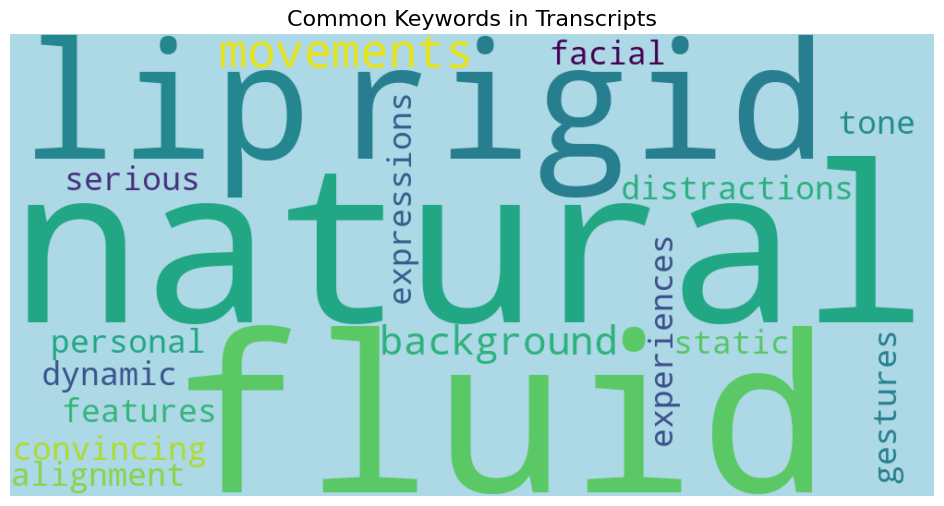

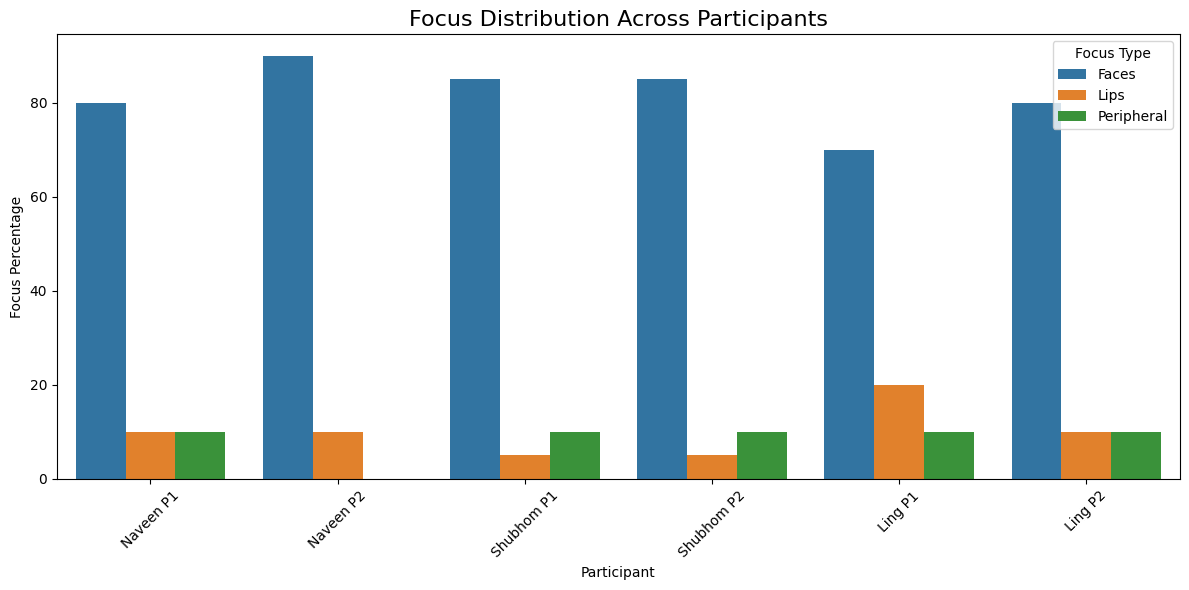

<ipython-input-3-e6a495f16f62>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_df, x="Count", y="Engagement Level", palette="pastel")


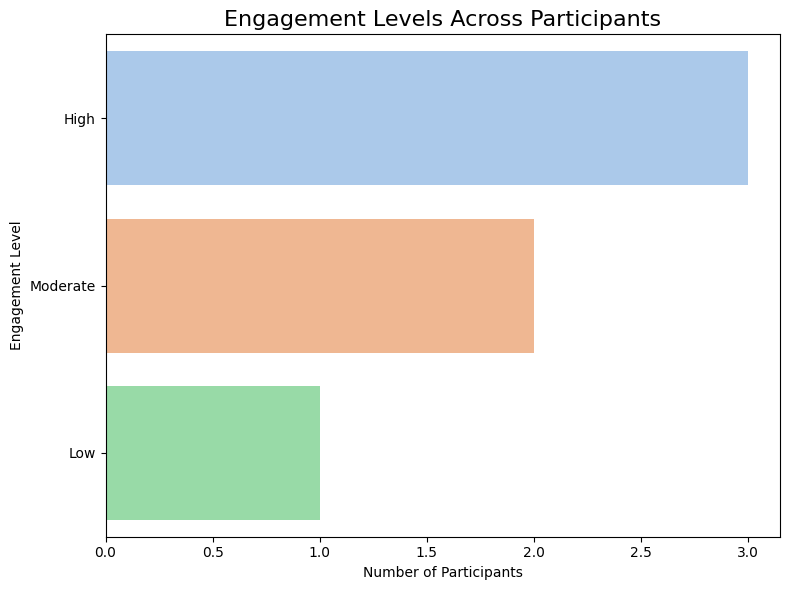

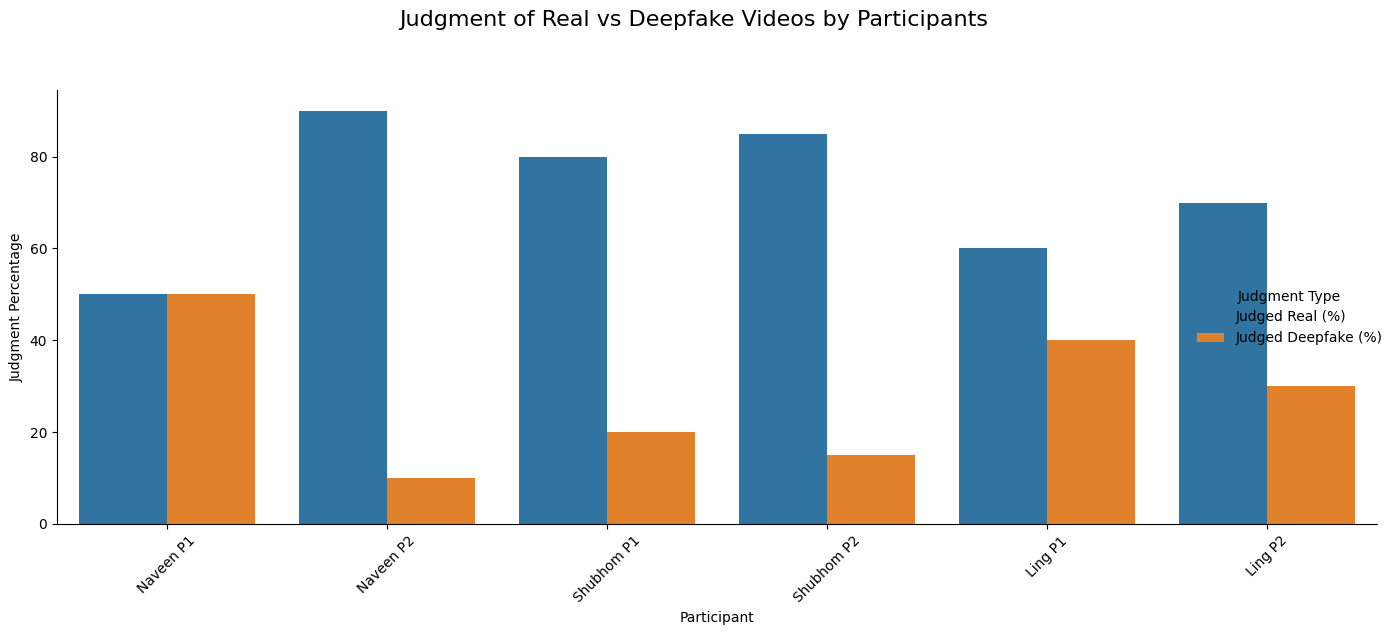

In [3]:
import seaborn as sns

# Word Cloud (recreating in a different style)
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=1000, height=500, background_color="lightblue").generate(transcripts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Keywords in Transcripts", fontsize=16)
plt.show()

# Focus Areas Visualization with Seaborn
df_focus_melted = df_focus.reset_index().melt(id_vars="index", var_name="Focus Type", value_name="Focus Percentage")
plt.figure(figsize=(12, 6))
sns.barplot(data=df_focus_melted, x="index", y="Focus Percentage", hue="Focus Type")
plt.title("Focus Distribution Across Participants", fontsize=16)
plt.ylabel("Focus Percentage")
plt.xlabel("Participant")
plt.xticks(rotation=45)
plt.legend(title="Focus Type")
plt.tight_layout()
plt.show()

# Engagement Levels as a Horizontal Bar Chart
engagement_df = pd.DataFrame(engagement_levels.items(), columns=["Engagement Level", "Count"])
plt.figure(figsize=(8, 6))
sns.barplot(data=engagement_df, x="Count", y="Engagement Level", palette="pastel")
plt.title("Engagement Levels Across Participants", fontsize=16)
plt.xlabel("Number of Participants")
plt.ylabel("Engagement Level")
plt.tight_layout()
plt.show()

# Judged Real vs. Deepfake (Facet Grid for comparison)
df_judgment_melted = df_judgment.reset_index().melt(id_vars="index", var_name="Judgment Type", value_name="Judgment Percentage")
g = sns.catplot(data=df_judgment_melted, x="index", y="Judgment Percentage", hue="Judgment Type", kind="bar", height=6, aspect=2)
g.set_xticklabels(rotation=45)
g.set_axis_labels("Participant", "Judgment Percentage")
g.fig.suptitle("Judgment of Real vs Deepfake Videos by Participants", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


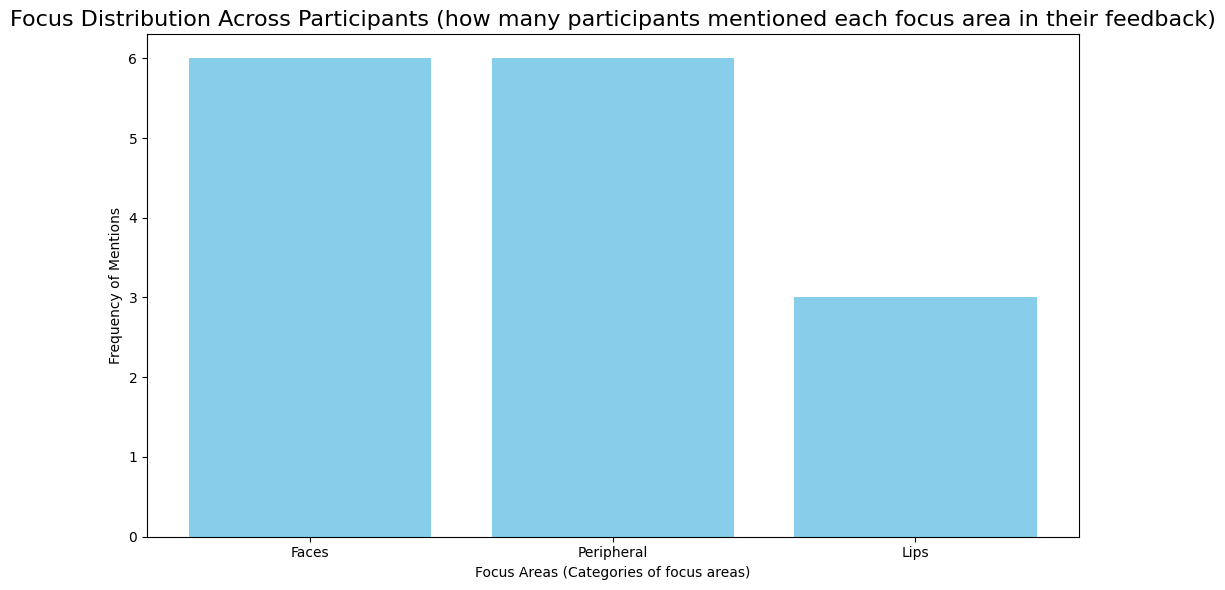

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [2]:
import re
from collections import defaultdict

# Processed participant data from the provided transcript
transcript = """
Naveen Participant 1:
- Focus: Faces (content + expressions), Peripheral (ring)
- Engagement: High (clear summary of content in Phase 1), Low (missed content Phase 2)
- Judgments: Real 50%, Deepfake 50%.
- Warning Label Influence: None

Naveen Participant 2:
- Focus: Faces (serious topic), Lips (audio misalignment), Peripheral (mic, blue frame, watch)
- Engagement: Moderate
- Judgments: Real 60%, Deepfake 40%.
- Warning Label Influence: Strong

R2 Participant 1:
- Focus: Faces (expression analysis), Lips (Inconsistent Lip Synchronization), Peripheral (shoulder texture)
- Engagement: High
- Judgments: Real 70%, Deepfake 30%.
- Warning Label Influence: Moderate

R2 Participant 2:
- Focus: Faces (dynamic expressions), Peripheral (guitar, painting)
- Engagement: Moderate
- Judgments: Real 85%, Deepfake 15%.
- Warning Label Influence: Strong

R3 Participant 1:
- Focus: Faces (general), Peripheral (hat, background)
- Engagement: Low
- Judgments: Real 50%, Deepfake 50%.
- Warning Label Influence: None

R3 Participant 2:
- Focus: Faces (context), Lips (audio misalignment), Peripheral (coin, hand)
- Engagement: Moderate
- Judgments: Real 80%, Deepfake 20%.
- Warning Label Influence: Strong
"""

# Extract data for visualization
focus_data = defaultdict(list)
engagement_data = defaultdict(int)
judgment_data = defaultdict(list)
label_influence = defaultdict(int)

# Parse lines for data
lines = transcript.splitlines()
for line in lines:
    if "Focus:" in line:
        focus_line = re.findall(r'Focus: (.+)', line)
        if focus_line:
            focus_items = re.findall(r'([A-Za-z]+) \((.+?)\)', focus_line[0])
            for item, context in focus_items:
                focus_data[item].append(context)
    if "Engagement:" in line:
        engagement = re.findall(r'Engagement: ([A-Za-z]+)', line)
        if engagement:
            engagement_data[engagement[0]] += 1
    if "Judgments:" in line:
        judgments = re.findall(r'Real (\d+%)', line)
        deepfake = re.findall(r'Deepfake (\d+%)', line)
        if judgments and deepfake:
            judgment_data['Real'].append(int(judgments[0].strip('%')))
            judgment_data['Deepfake'].append(int(deepfake[0].strip('%')))
    if "Warning Label Influence:" in line:
        influence = re.findall(r'Warning Label Influence: ([A-Za-z]+)', line)
        if influence:
            label_influence[influence[0]] += 1

# Quantify focus areas
focus_summary = {key: len(value) for key, value in focus_data.items()}

# Prepare dataframes for visualization
engagement_summary = pd.DataFrame(list(engagement_data.items()), columns=["Engagement Level", "Count"])
judgment_summary = pd.DataFrame([
    ["Real", sum(judgment_data["Real"]) / len(judgment_data["Real"])],
    ["Deepfake", sum(judgment_data["Deepfake"]) / len(judgment_data["Deepfake"])]
], columns=["Judgment Type", "Percentage"])
label_influence_summary = pd.DataFrame(list(label_influence.items()), columns=["Influence Level", "Count"])

# Visualize Focus Areas
plt.figure(figsize=(10, 6))
plt.bar(focus_summary.keys(), focus_summary.values(), color="skyblue")
plt.title("Focus Distribution Across Participants (how many participants mentioned each focus area in their feedback)", fontsize=16)
plt.ylabel("Frequency of Mentions")
plt.xlabel("Focus Areas (Categories of focus areas)")
plt.tight_layout()
plt.show()

# Visualize Engagement Levels
plt.figure(figsize=(8, 6))
sns.barplot(data=engagement_summary, x="Count", y="Engagement Level", palette="pastel")
plt.title("Engagement Levels Across Participants", fontsize=16)
plt.tight_layout()
plt.show()

# Visualize Judgments
plt.figure(figsize=(8, 6))
sns.barplot(data=judgment_summary, x="Judgment Type", y="Percentage", palette="muted")
plt.title("Judgment of Real vs Deepfake Videos", fontsize=16)
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

# Visualize Label Influence
plt.figure(figsize=(8, 6))
sns.barplot(data=label_influence_summary, x="Count", y="Influence Level", palette="coolwarm")
plt.title("Impact of Warning Label", fontsize=16)
plt.tight_layout()
plt.show()


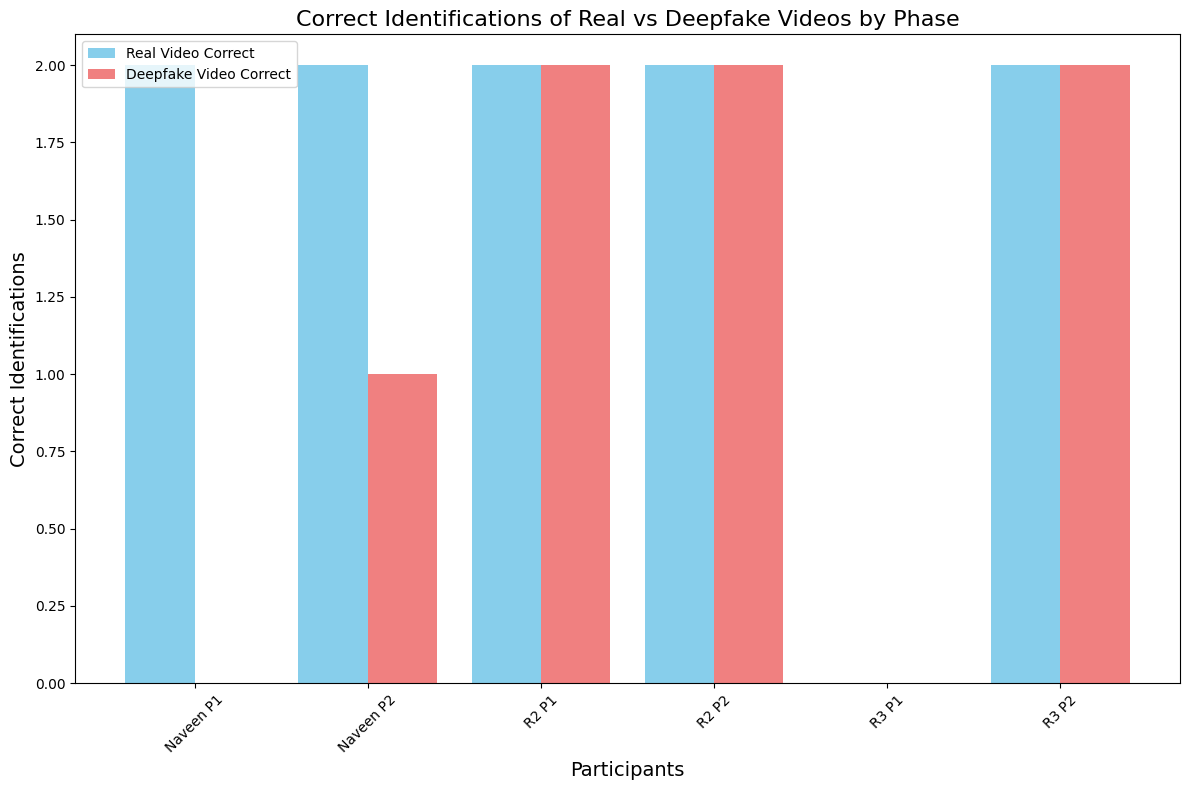

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for visualization
data = {
    "Participant": [
        "Naveen P1", "Naveen P1", "Naveen P2", "Naveen P2",
        "R2 P1", "R2 P1", "R2 P2", "R2 P2",
        "R3 P1", "R3 P1", "R3 P2", "R3 P2"
    ],
    "Phase": [
        "1 & 2", "3 & 4", "1 & 2", "3 & 4",
        "1 & 2", "3 & 4", "1 & 2", "3 & 4",
        "1 & 2", "3 & 4", "1 & 2", "3 & 4"
    ],
    "Real Video Correct": [
        True, True, True, True,
        True, True, True, True,
        False, False, True, True
    ],
    "Deepfake Video Correct": [
        False, False, False, True,
        True, True, True, True,
        False, False, True, True
    ]
}

# Convert data into DataFrame
df = pd.DataFrame(data)

# Create a bar chart for Real and Deepfake video correctness
plt.figure(figsize=(12, 8))
bar_width = 0.4

# Positions for the bars
participants = df["Participant"].unique()
positions = range(len(participants))

# Separate data for real and deepfake correctness
real_correct = df[df["Real Video Correct"]].groupby("Participant").size()
deepfake_correct = df[df["Deepfake Video Correct"]].groupby("Participant").size()

# Align data for bar chart
real_correct_aligned = [real_correct.get(p, 0) for p in participants]
deepfake_correct_aligned = [deepfake_correct.get(p, 0) for p in participants]

# Plot
plt.bar(positions, real_correct_aligned, width=bar_width, label="Real Video Correct", color="skyblue")
plt.bar([p + bar_width for p in positions], deepfake_correct_aligned, width=bar_width, label="Deepfake Video Correct", color="lightcoral")

# Labels and title
plt.xlabel("Participants", fontsize=14)
plt.ylabel("Correct Identifications", fontsize=14)
plt.title("Correct Identifications of Real vs Deepfake Videos by Phase", fontsize=16)
plt.xticks([p + bar_width / 2 for p in positions], participants, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


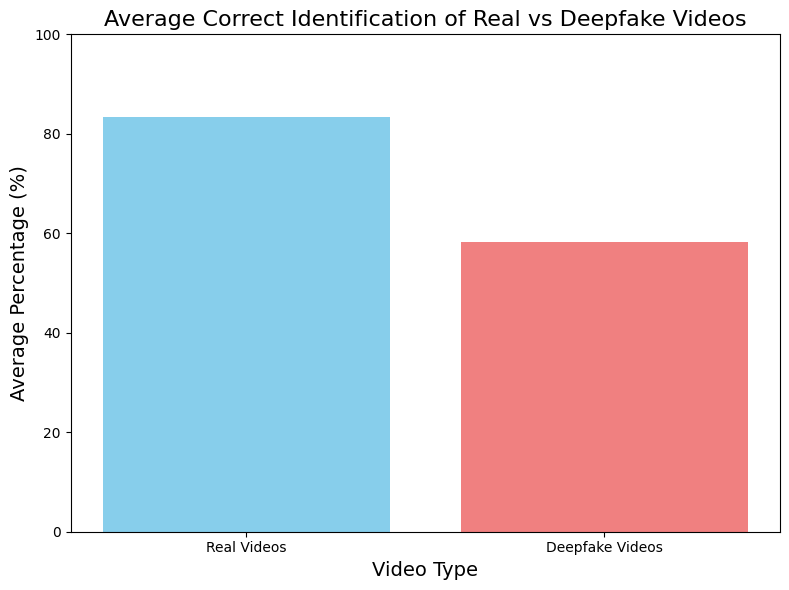

In [17]:
# Data for visualization
video_types = ["Real Videos", "Deepfake Videos"]
average_correct = [83.33, 58.33]  # Correct averages

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(video_types, average_correct, color=["skyblue", "lightcoral"])
plt.title("Average Correct Identification of Real vs Deepfake Videos", fontsize=16)
plt.ylabel("Average Percentage (%)", fontsize=14)
plt.xlabel("Video Type", fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
